In [ ]:
import numpy as np
import pandas as pd

# Read the first 1000 rows from the cubic structure Excel file
dataset_cubic = pd.read_excel('/content/cubic.xlsx', nrows=1000)
X_cubic = dataset_cubic.iloc[:, 1:27].values
y_1 = dataset_cubic.iloc[:, 27:28].values
identity_cubic = np.ones([len(X_cubic), 1]) * 1
X_1 = np.hstack((X_cubic, identity_cubic))

# Read the first 1000 rows from the hexagonal structure Excel file
dataset_hexagonal = pd.read_excel('/content/hexagonal.xlsx', nrows=1000)
X_hexagonal = dataset_hexagonal.iloc[:, 1:27].values
y_2 = dataset_hexagonal.iloc[:, 27:28].values
identity_hexagonal = np.ones([len(X_hexagonal), 1]) * 2
X_2 = np.hstack((X_hexagonal, identity_hexagonal))


In [ ]:
import numpy as np
import pandas as pd

# Read the first 1000 rows from the cubic structure Excel file
dataset_cubic = pd.read_excel('/content/cubic.xlsx', nrows=1000)
X_cubic = dataset_cubic.iloc[:, 1:27].values
y_1 = dataset_cubic.iloc[:, 27:28].values
identity_cubic = np.ones([len(X_cubic), 1]) * 1
X_1 = np.hstack((X_cubic, identity_cubic))

# Read the first 1000 rows from the hexagonal structure Excel file
dataset_hexagonal = pd.read_excel('/content/hexagonal.xlsx', nrows=1000)
X_hexagonal = dataset_hexagonal.iloc[:, 1:27].values
y_2 = dataset_hexagonal.iloc[:, 27:28].values
identity_hexagonal = np.ones([len(X_hexagonal), 1]) * 2
X_2 = np.hstack((X_hexagonal, identity_hexagonal))

# Read the first 1000 rows from the monoclinic structure Excel file
dataset_monoclinic = pd.read_excel('/content/monoclinic.xlsx', nrows=1000)
X_monoclinic = dataset_monoclinic.iloc[:, 1:27].values
y_3 = dataset_monoclinic.iloc[:, 27:28].values
identity_monoclinic = np.ones([len(X_monoclinic), 1]) * 3
X_3 = np.hstack((X_monoclinic, identity_monoclinic))

# Read the first 1000 rows from the orthorhombic structure Excel file
dataset_orthorhombic = pd.read_excel('/content/orthorhombic.xlsx', nrows=1000)
X_orthorhombic = dataset_orthorhombic.iloc[:, 1:27].values
y_4 = dataset_orthorhombic.iloc[:, 27:28].values
identity_orthorhombic = np.ones([len(X_orthorhombic), 1]) * 4
X_4 = np.hstack((X_orthorhombic, identity_orthorhombic))

# Read the first 1000 rows from the tetragonal structure Excel file
dataset_tetragonal = pd.read_excel('/content/tetragonal.xlsx', nrows=1000)
X_tetragonal = dataset_tetragonal.iloc[:, 1:27].values
y_5 = dataset_tetragonal.iloc[:, 27:28].values
identity_tetragonal = np.ones([len(X_tetragonal), 1]) * 5
X_5 = np.hstack((X_tetragonal, identity_tetragonal))

# Read the first 1000 rows from the triclinic structure Excel file
dataset_triclinic = pd.read_excel('/content/triclinic.xlsx', nrows=1000)
X_triclinic = dataset_triclinic.iloc[:, 1:27].values
y_6 = dataset_triclinic.iloc[:, 27:28].values
identity_triclinic = np.ones([len(X_triclinic), 1]) * 6
X_6 = np.hstack((X_triclinic, identity_triclinic))

# Read the first 1000 rows from the trigonal structure Excel file
dataset_trigonal = pd.read_excel('/content/trigonal.xlsx', nrows=1000)
X_trigonal = dataset_trigonal.iloc[:, 1:27].values
y_7 = dataset_trigonal.iloc[:, 27:28].values
identity_trigonal = np.ones([len(X_trigonal), 1]) * 7
X_7 = np.hstack((X_trigonal, identity_trigonal))

# Combine all datasets
X = np.vstack((X_1, X_2, X_3, X_4, X_5, X_6, X_7))
y = np.vstack((y_1, y_2, y_3, y_4, y_5, y_6, y_7))

# Process the data
doping = X[:, 13]
indices_1 = np.where(doping == 1e20)
X1 = X[indices_1, :][0]
y1 = y[indices_1, :][0]

indices_2 = np.where(doping == 1e19)
X2 = X[indices_2, :][0]
y2 = y[indices_2, :][0]

indices_3 = np.where(doping == 1e18)
X3 = X[indices_3, :][0]
y3 = y[indices_3, :][0]

temperature = X3[:, 12]
indices_4 = np.where(temperature < 1000)
X3 = X3[indices_4, :][0]
y3 = y3[indices_4, :][0]

X = np.vstack((X1, X2, X3))
y = np.vstack((y1, y2, y3))

indices_5 = np.where(y * (10**-21) >= 1)  # Only power factor >= 1
y = np.log10(y[indices_5, :][0])**6
X = X[indices_5, :][0]


In [ ]:
# XG Boost regression

# Split the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

from xgboost import XGBRegressor

regressor = XGBRegressor(n_estimators = 319,
                         max_depth = 10,
                         min_child_weight = 10,
                         learning_rate = 0.2,
                         gamma = 1,
                         alpha = 0.75,
                         reg_lambda = 10,
                         scale_pos_weight = 3.4,
                         subsample = 1) # n_estimators refers to the number of trees needed

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

The MAPE is 17.62 %.


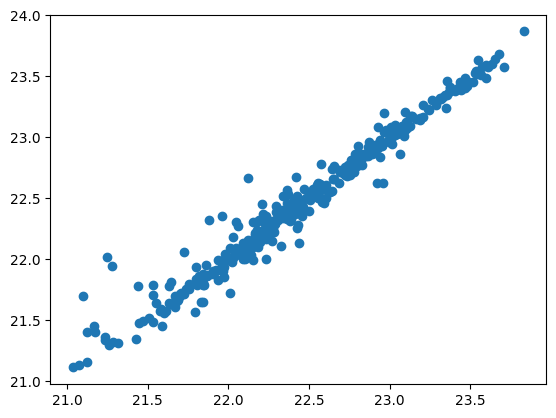

In [ ]:
# Plot actual vs predicted and compute MAPE
plt.scatter(y_test**(1/6),y_pred**(1/6))
pred = 10**(y_pred**(1/6))
target = 10**(y_test**(1/6))
total = 0
cnt = 0
for i in range(len(y_pred)):
    total += (abs(target[i] - pred[i])/target[i])*100
    cnt += 1
print("The MAPE is " + str(round((total/cnt)[0],2)) + " %.")